# K-means

- クラスタリングアルゴリズムの一つ
    - 多数のアイテムが与えられた際に、それをいくつかのクラスタに分類する
    - 教師なし学習 - 正解はない
- 事前にクラスタ数を指定する必要がある
- 2つの動作を収束するまで繰り返す
    - 仮のクラスタの重心(セントロイド)を求める
    - 最も近い重心に属するように仮のクラスタを再構成する


In [1]:
# hide
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# 3つのクラスタからなるデータセットを作る
X, y = make_blobs(random_state=1)

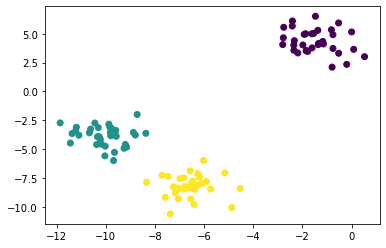

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0], dtype=int32)

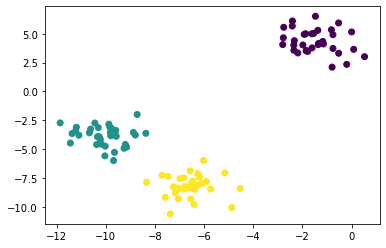

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

In [6]:
y

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [7]:
kmeans.labels_ == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# アルゴリズムの説明

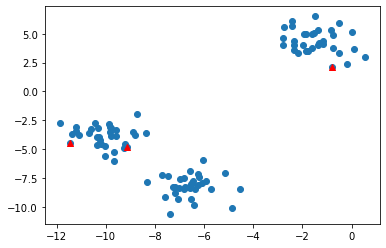

In [8]:
# 初期化
X, y = make_blobs(random_state=1)
center = X[:3, :]
# 初期状態の表示
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(center[:, 0], center[:, 1], marker='^', color = "red")


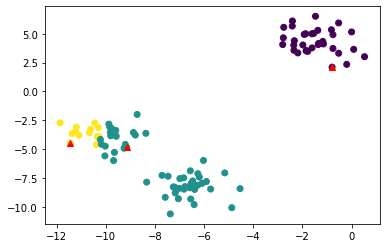

In [9]:
# クラスタ割当の計算
labels = np.argmin(pairwise_distances(center, X), axis=0)
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(center[:, 0], center[:, 1], marker='^', color = "red")


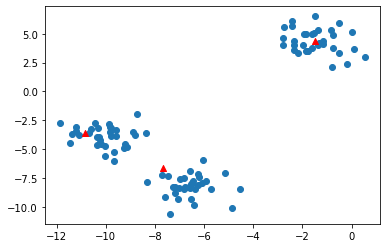

In [10]:
# セントロイドの再計算
center2 = np.array([X[labels==0].mean(0), X[labels==1].mean(0), X[labels==2].mean(0)])
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(center2[:, 0], center2[:, 1], marker='^', color = "red")

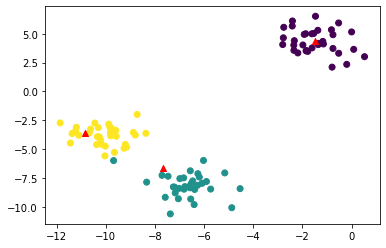

In [11]:
# クラスタ割当の計算
labels = np.argmin(pairwise_distances(center2, X), axis=0)
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(center2[:, 0], center2[:, 1], marker='^', color = "red")

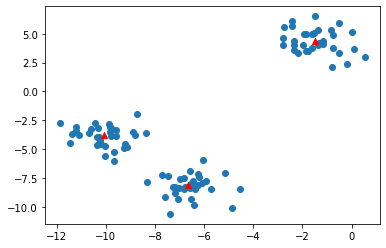

In [12]:
# セントロイドの再計算
center3 = np.array([X[labels==0].mean(0), X[labels==1].mean(0), X[labels==2].mean(0)])
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(center3[:, 0], center3[:, 1], marker='^', color = "red")

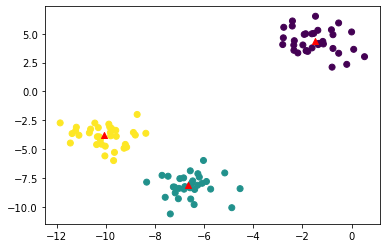

In [13]:
# クラスタ割当の計算
labels = np.argmin(pairwise_distances(center3, X), axis=0)
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(center3[:, 0], center3[:, 1], marker='^', color = "red")

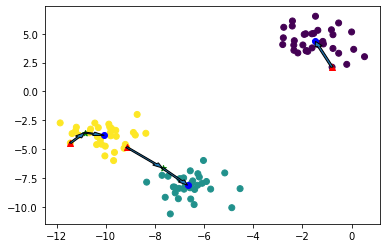

In [14]:
# セントロイドの動き
plt.scatter(X[:, 0], X[:, 1], c = labels)
for i in range(3):
    plt.arrow(center[i, 0], center[i, 1], center2[i, 0] - center[i, 0], center2[i, 1] - center[i, 1], length_includes_head=True, width=0.1)
    plt.arrow(center2[i, 0], center2[i, 1], center3[i, 0] - center2[i, 0], center3[i, 1] - center2[i, 1], length_includes_head=True, width=0.1)
plt.scatter(center[:, 0], center[:, 1], marker='^', color = "red")
plt.scatter(center2[:, 0], center2[:, 1], marker='*', color = "green")
plt.scatter(center3[:, 0], center3[:, 1], marker='o', color = "blue")


## 評価指標
- 正解データがあるとき
    - ARI: 調整ランド指数
    - NMI: 正規化相互情報量
- シルエットスコア
    - クラスタの凝集度を評価
    - 0-1の値を取る

## kmeans の問題点
- 事前にクラスタの数を指定しなければならない
    - 一般にはクラスタ数は事前にはわからない
- 凸形状の分布でないとうまく分割できない

### クラスタ数の決定
- シルエットスコアを用いる
- エルボー法
  - クラスタ数を変化させてクラスタリングを複数回行う
  - 出来上がったクラスタの凝集度を、クラスタセンターとの平均二乗誤差で評価
  - 評価値が急に変動した、肘(エルボー)のような形状になっている点のクラスタ数を採用する

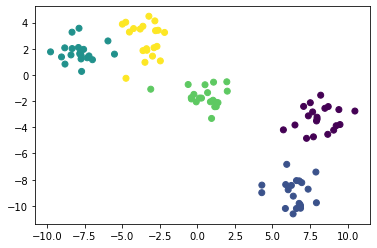

In [15]:
# 5クラスタのデータセットを作る
X, y = make_blobs(random_state=6, centers=5)
plt.scatter(X[:,0], X[:,1], c=y)

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)


0.5810848635319777

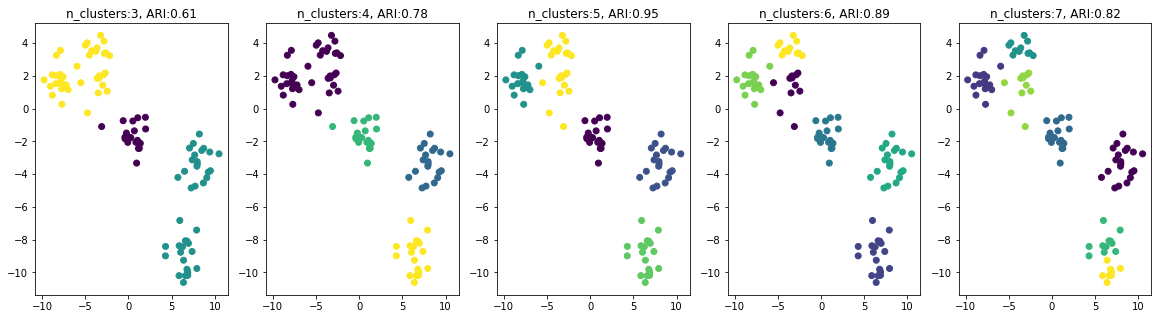

In [17]:
# 3-7 クラスタでクラスタリングした結果とARI
#   注意: ARIは正解がないと算出できないのでクラスタ数の決定には使えない
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
aris, sils, inrs = [], [], []
for i, nc in enumerate(range(3, 8)):
    kmeans = KMeans(n_clusters=nc)
    kmeans.fit(X)
    aris.append(adjusted_rand_score(y, kmeans.labels_))
    sils.append(silhouette_score(X, kmeans.labels_))
    inrs.append(kmeans.inertia_)
    axes[i].scatter(X[:,0], X[:,1], c=kmeans.labels_)
    axes[i].set_title("n_clusters:{}, ARI:{:.2f}".format(nc, aris[-1]))

Text(0.5, 1.0, 'inertia')

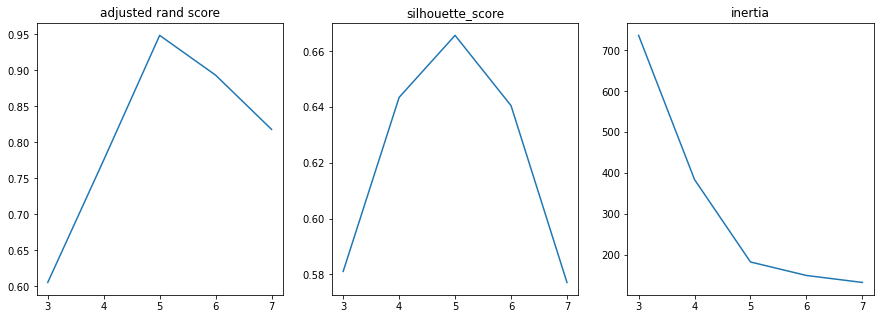

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(range(3, 8), aris)
axes[0].set_title("adjusted rand score")
axes[1].plot(range(3, 8), sils)
axes[1].set_title("silhouette_score")
axes[2].plot(range(3, 8), inrs)
axes[2].set_title("inertia")


## 凝集型クラスタリング
- 1点1クラスタという状況から初めて徐々にクラスタを大きくしていく
- 最も近接している2つのクラスタを融合して、クラスタの数を減らしていく
- デンドログラムを見ると適切なクラスタ数がわかる

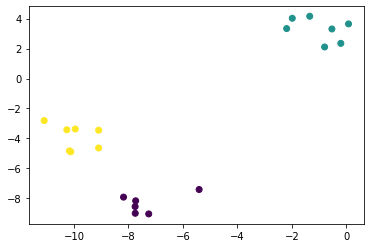

In [19]:
X, y = make_blobs(random_state=1, n_samples=20)
agg = AgglomerativeClustering(n_clusters=3)
agg.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=agg.labels_)

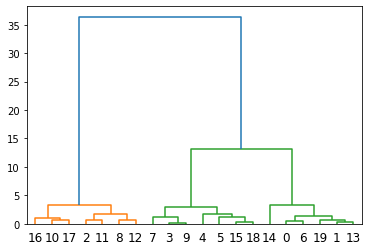

In [20]:
# デンドログラムの描画
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X)
dendrogram(linkage_array)
None

## K-meansでも凝集法でも分類できない例

- 凸でない形状のクラスタはうまくクラスタリングできない
- 本質的に凸の形状に空間を分割しようとするため

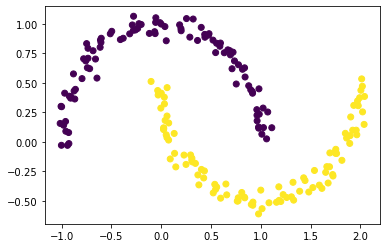

In [21]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=1)
plt.scatter(X[:,0], X[:,1], c=y)

Text(0.5, 1.0, 'Agglomerative')

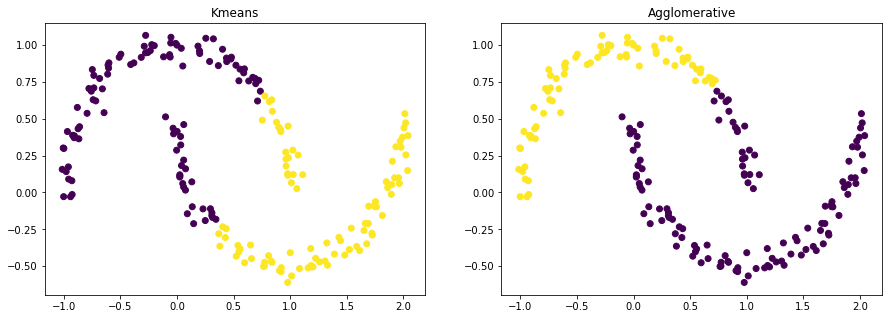

In [22]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
agg = AgglomerativeClustering(n_clusters=2)
agg.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].scatter(X[:,0], X[:,1], c=kmeans.labels_)
axes[0].set_title("Kmeans")
axes[1].scatter(X[:,0], X[:,1], c=agg.labels_)
axes[1].set_title("Agglomerative")


### DBSCAN
- 密度に基づくノイズあり空間クラスタリング
- 密度の高い領域がクラスタを構成していて、クラスタ間には密度が低い領域が存在するという過程
- 密度の高いコアサンプルを探し、近傍点を加える形でクラスタを作っていく
- どのクラスタにも属さないノイズ点が存在しうる
- パラメータの調整が必要
    - min_samples コアサンプルとなるために必要な近傍点数
    - eps 近傍を決める距離


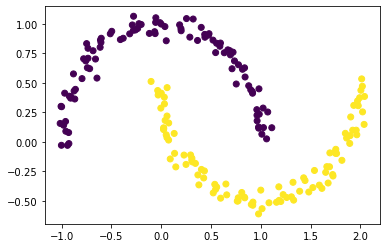

In [23]:
dbscan = DBSCAN(min_samples=5, eps=0.2)
dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)